In [2]:
# Modules
import ipywidgets as widgets
from ipywidgets import interact_manual
import matplotlib.pyplot as plt
import pandas as pd

# needed to use matplotlib with jupyter widgets
%matplotlib notebook

from IPython.display import display, clear_output
import warnings
warnings.filterwarnings("ignore")

from utils import calculate_scores

[2021-09-29 00:18:19,164 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [ ]:
!git clone https://github.com/aub-mind/arabert

<IPython.core.display.Javascript object>


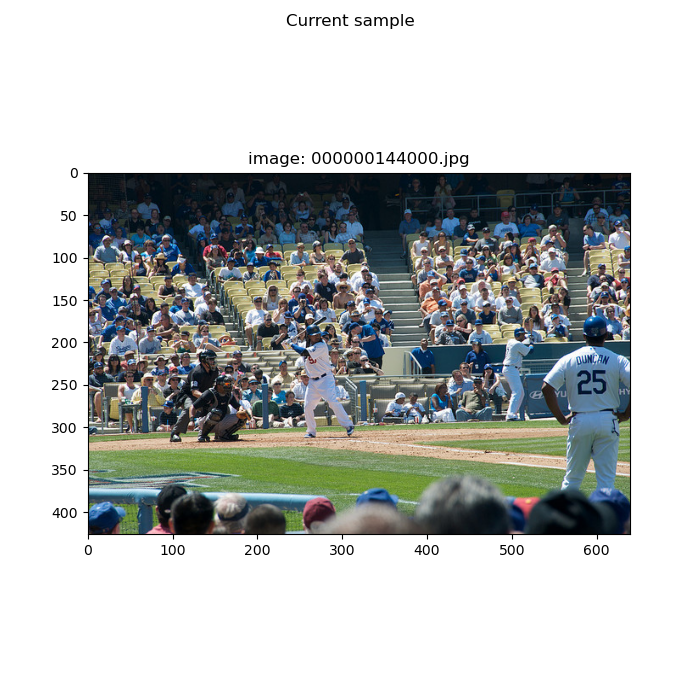

In [3]:
# Create the widgets
left = widgets.Button(description='Left')
right = widgets.Button(description='Right')
out = widgets.Output()

# get the file names
DATA_PATH = 'images_200/'
full_df = pd.read_json('results_comparison_200.json')

# Setting the first and last indexs
i=0 # starting index
i_max = full_df.shape[0] # ending index

# Plot the first picture
img = plt.imread(f'{DATA_PATH}/{full_df.iloc[i, 0]}')
fig, ax = plt.subplots(1, figsize=(7, 7))
ax = plt.imshow(img)
plt.suptitle("Current sample")
plt.show()
with out:
    clear_output()
    display(full_df.iloc[i:i+1].drop('file_name', axis=1))
    display(calculate_scores(full_df.iloc[i]))

# plots the next image
def plot_next(*args):
    global i
    i += 1
    # stop
    if i >= i_max: 
        print("Done")
        return

    
    # get next image index
    img = plt.imread(f'{DATA_PATH}/{full_df.iloc[i, 0]}')
    ax.set_data(img)
    plt.show()
    plt.title(f"image: {full_df.iloc[i, 0]}")
    with out:
        clear_output()
        display(full_df.iloc[i:i+1].drop('file_name', axis=1))
        display(calculate_scores(full_df.iloc[i]))

def plot_previous(*args):
    global i
    i -= 1
    # stop
    if i < 0: 
        print("Done")
        return

    
    
    # get next image index
    img = plt.imread(f'{DATA_PATH}/{full_df.iloc[i, 0]}')
    ax.set_data(img)
    plt.show()
    plt.title(f"image: {full_df.iloc[i, 0]}")

    with out:
        clear_output()
        display(full_df.iloc[i:i+1].drop('file_name', axis=1))
        display(calculate_scores(full_df.iloc[i]))
    
    
# attaching the buttons to their callback functions         
right.on_click(plot_next)
left.on_click(plot_previous)

# showing the widgets
vb1 = widgets.VBox([right, left])
vb2 = widgets.VBox([out])
widgets.HBox([vb1, vb2])